## Laboratorium 4 - algorytm Najbliższej Średniej (NM)


### Opis
Celem laboratorium jest implementacja klasyfikatora najbliższej średniej NM (*Nearest Mean*).


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Euklidesa**.
* Zaimplementuj funkcję, która zwraca macierz kowariancji (*uwaga: biblioteka `numpy` posiada gotową implementację `cov` z którą możesz porównać wynik*).

    \begin{equation*}
    C = \frac{1}{n - 1} (X - \bar X)(X - \bar X)^T
    \end{equation*}

    gdzie:
    * $X$ to macierz, 
    * $\bar X$ to wektor ze średnimi wartościami cech. 

* **Zaimplementuj klasyfikator najbliższej średniej (NM) z zastosowaniem odległości Machalanobisa**.

    \begin{equation*}
    D_j = \sqrt{ (x - \mu_j)^T S_j^{-1}(x - \mu_j) },
    \end{equation*}

    gdzie:
    * $D_j$ to odległość klasyfikowanej próbki do $j$-tej klasy (grupy, klastra), 
    * $\mu_j$ to wektor ze średnimi wartościami cech w obrębie $j$-tej klasy, 
    * $S_j^{-1}$ to odwrócona macierz kowariancji $j$-tej klasy, 
    * a $x$ to klasyfikowana próbka.

* Opisz wyniki klasyfikatorów i porównaj je z klasyfikatorem *k*NN (porównaj w kontekście różnych metryk - obowiązkowo tablica pomyłek).

> Podpowiedź 1: Do obliczenia macierzy odwrotnej możesz użyć gotową implementację, np. funkcję `linalg.inv` z biblioteki `numpy`.

> Podpowiedź 2: Do wszelkich podstawowych operacji na macierzach (mnożenie, transpozycja, dodawanie, odejmowanie, itp.) możesz zastosować gotową implementację, np. bibliotekę `numpy`.

> UWAGA 1: W niniejszym zadaniu jest dowolność implementacji (nie trzeba trzymać się struktury z poprzedniego zadania), jednak algorytm NM należy zaimplementować samodzielnie bez korzystania z istniających rozwiązań (jak np. z biblioteki `scikit-learn`).

> UWAGA 2: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.


**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```


<span style="text-decoration:underline">Referencje</span>

1. Mahalanobis, P C, _On test and measures of group divergence : theoretical formulae_, Journal and Proceedings of Asiatic Society of Bengal (New Series) Vol. 26, pp. 541-588. 1930. (URL: http://library.isical.ac.in:8080/xmlui/bitstream/handle/10263/1639/029.pdf)
2. McLachlan, Goeffrey J. _Mahalanobis distance_, Resonance, pp. 20-26. 1999. (URL: https://www.ias.ac.in/article/fulltext/reso/004/06/0020-0026)

In [1]:
import numpy as np
import random
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats


with open('dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

In [2]:
#obliczanie dystansu
def edist(p1, p2, attributes):
    p1_new = []
    p2_new = []
    distance = 0
    
    for i in attributes:
        p1_new.append(p1[i])
        p2_new.append(p2[i])
    
    for i in range(len(p1_new)):
        distance += (p1_new[i] - p2_new[i])**2
        
    return distance**0.5

In [3]:
def NM():
    pass

In [11]:
def average(lst):
    return sum(lst)/len(lst)

In [20]:
def get_mean(leaves,attributes,leaf_class):
    leaf_mean =[]
    for num_leaf in leaf_class:
        leaf = leaves[(leaves[:,0]== num_leaf)]
        attribute_mean = [num_leaf]
        for attribute in attributes:
            leaf_attribute = leaf[:,attribute]
            mean = average(leaf_attribute)
            attribute_mean.append(mean)
        leaf_mean.append(attribute_mean)
    return leaf_mean

In [21]:
# test_n = train[(train[:,0]== 3)]
# print(test_n)
# test_n = test_n[:,1]
# print(test_n)

In [23]:
#wybór klas
def get_class(classes):
    for i in range(len(classes)):
        if i == 0:
            new_train = np.array(train[train[:,0] == classes[i]])
            new_test = np.array(test[test[:,0] == classes[i]])
        else:
            new_train = np.vstack((new_train,train[train[:,0] == classes[i]]))
            new_test = np.vstack((new_test,test[test[:,0] == classes[i]]))
    return new_train, new_test

attributes = [4,8]
leaf_class = [5,7] #nigra, robur

train_new, test_new = get_class(leaf_class)
means = get_mean(train_new,attributes,leaf_class)
print(means)


[[5, 0.6437878635015158, 0.05229376613526372], [7, 0.5317246149550815, 0.03168745724568389]]


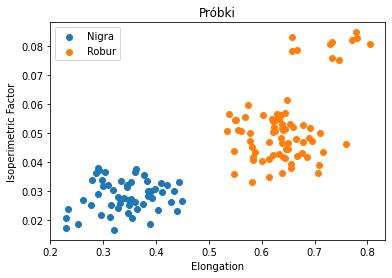

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Próbki")
plt.xlabel(f"Elongation")
plt.ylabel(f"Isoperimetric Factor")


klasy = [3, 5]
name = {3: 'Nigra', 5: 'Robur'}
for i in klasy:
    data_plt = train_new[train_new[:, 0] == i]
    plt.scatter(x=data_plt[:,4], 
                y=data_plt[:,8], 
                label=name[i])

plt.legend()